<a href="https://colab.research.google.com/github/prateek-jnsagar/Business-Cases-Data-Exploration/blob/main/Porter_Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

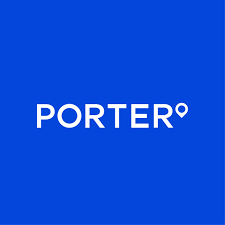

**Problem Statement**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time

file_path = '/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Logistincs_NN/dataset.csv'
df = pd.read_csv(file_path)
df

CPU times: user 681 ms, sys: 137 ms, total: 818 ms
Wall time: 3.21 s


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


### Converting Date columns to Datetime format :

In [ ]:
date_format = "%Y-%m-%d %H:%M:%S"
df["created_at"] = pd.to_datetime(df["created_at"], format= date_format)


In [ ]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"], format= date_format)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.dtypes


market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                            object
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
dtype: object

In [ ]:
df.sample()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
143006,4.0,2015-01-25 02:24:56,2015-01-25 04:01:25,a2137a2ae8e39b5002a3f8909ecb88fe,pizza,1.0,2,3915,2,1365,1750,60.0,79.0,99.0


In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'], dtype='object')

In [ ]:
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [ ]:
categorical_features = ["market_id","store_id","store_primary_category","order_protocol","total_items","num_distinct_items"]
numerical_features = ['subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']
date_time_features = ['created_at','actual_delivery_time']

In [ ]:
len(categorical_features), len(numerical_features),len(date_time_features)

(6, 6, 2)

In [ ]:
df.describe().loc[["mean","50%"]].T.loc[numerical_features]

,mean,50%
subtotal,2682.331402,2200.0
min_item_price,686.218470,595.0
max_item_price,1159.588630,1095.0
total_onshift_partners,44.808093,37.0
total_busy_partners,41.739747,34.0
total_outstanding_orders,58.050065,41.0


### missing value check :

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,987,0.499929
1,created_at,0,0.000000
2,actual_delivery_time,7,0.003546
3,store_id,0,0.000000
4,store_primary_category,4760,2.411006
5,order_protocol,995,0.503981
6,total_items,0,0.000000
7,subtotal,0,0.000000
8,num_distinct_items,0,0.000000
9,min_item_price,0,0.000000


## Distribution of final price of the orders.

<AxesSubplot:xlabel='subtotal', ylabel='Density'>

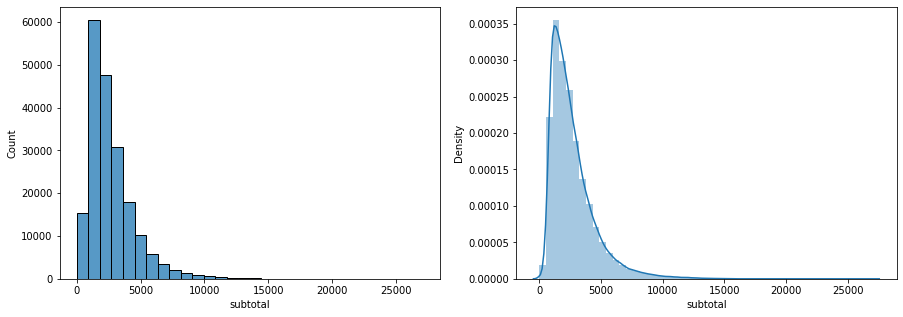

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["subtotal"],bins=30)
plt.subplot(1,2,2)
sns.distplot(df["subtotal"])


<AxesSubplot:xlabel='subtotal'>

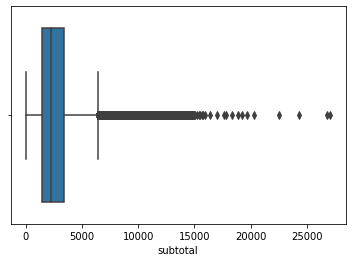

In [ ]:
sns.boxplot(df["subtotal"])

# Creating the target column:
###  time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)

      delivery_time = actual_delivery_time - created_at
      in minutes

In [ ]:
 df["delivery_time"] = (df["actual_delivery_time"]-df["created_at"])/ pd.Timedelta(minutes=1)

In [ ]:
df["delivery_time"].describe().reset_index()

,index,delivery_time
0,count,197421.000000
1,mean,48.470956
2,std,320.493482
3,min,1.683333
4,25%,35.066667
5,50%,44.333333
6,75%,56.350000
7,max,141947.650000


In [ ]:
df["delivery_time"].quantile([0.01,0.10,0.25,0.50,0.75,0.90,0.99,0.995,0.999,0.9995])

0.0100     19.200000
0.1000     28.316667
0.2500     35.066667
0.5000     44.333333
0.7500     56.350000
0.9000     70.583333
0.9900    107.913333
0.9950    122.215000
0.9990    165.581000
0.9995    201.086167
Name: delivery_time, dtype: float64

In [ ]:
df.shape

(197428, 15)

In [ ]:
# considering delivery time > 165 minutes as a complete outlier. hence removing those values from the data.
df = df.loc[~(df["delivery_time"]>df["delivery_time"].quantile(0.999))]

# further outlier treatment to be done later.


In [ ]:
df.shape

(197230, 15)

### Missing value treatment for "order_protocol":

In [ ]:
# order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
df["order_protocol"].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [ ]:
df["order_protocol"] = df["order_protocol"].astype('object')

In [ ]:

# filling NaN category store primary category with Other.
df.order_protocol = df.order_protocol.fillna("Other")


In [ ]:
df["order_protocol"].unique()

array([1.0, 2.0, 3.0, 4.0, 'Other', 5.0, 6.0, 7.0], dtype=object)

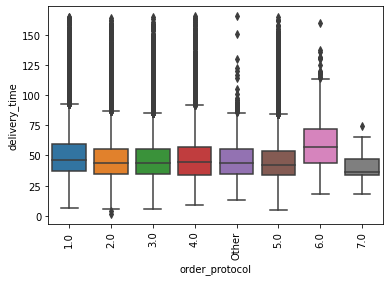

In [ ]:

sns.boxplot(x = df["order_protocol"],
            y = df["delivery_time"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.groupby(["order_protocol"]).describe()["delivery_time"]

,count,mean,std,min,25%,50%,75%,max
order_protocol,,,,,,,,
1.0,54671.0,49.748925,18.452947,6.433333,36.766667,46.483333,59.166667,164.900000
2.0,24018.0,47.106471,17.560518,1.683333,35.016667,44.100000,55.716667,164.200000
3.0,53154.0,46.690563,16.844630,5.416667,34.983333,43.750000,55.033333,164.650000
4.0,19325.0,48.144899,20.203254,8.600000,34.100000,44.250000,57.250000,165.233333
5.0,44252.0,45.409249,17.123764,4.950000,33.550000,42.416667,53.900000,164.966667
6.0,790.0,59.679388,21.491241,18.316667,43.800000,56.616667,71.887500,160.016667
7.0,19.0,41.370175,13.797148,18.050000,33.433333,36.166667,47.166667,74.083333
Other,994.0,46.712056,17.647980,12.916667,34.650000,43.500000,54.966667,165.416667


In [ ]:
df.shape

(197230, 15)

In [ ]:
df = df[~df["actual_delivery_time"].isna()]

In [ ]:
df.shape

(197223, 15)

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,986,0.499942
1,created_at,0,0.000000
2,actual_delivery_time,0,0.000000
3,store_id,0,0.000000
4,store_primary_category,4756,2.411483
5,order_protocol,0,0.000000
6,total_items,0,0.000000
7,subtotal,0,0.000000
8,num_distinct_items,0,0.000000
9,min_item_price,0,0.000000


In [ ]:
# observing time series of Delivery_time : for seasonality and patern

<AxesSubplot:xlabel='created_at'>

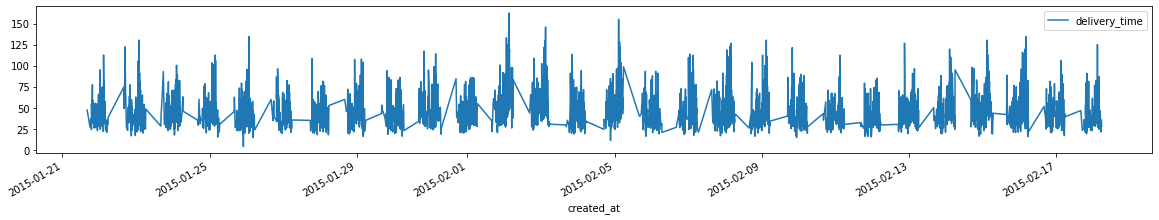

In [ ]:
plt.rcParams['figure.figsize'] = (20, 3)

df[["created_at","delivery_time"]].set_index("created_at").head(5000).plot()

<AxesSubplot:xlabel='created_at'>

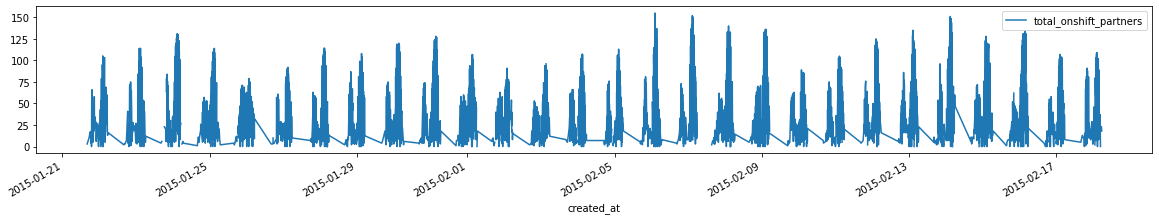

In [ ]:
df[["created_at","total_onshift_partners"]].set_index("created_at").head(5000).plot()

<AxesSubplot:xlabel='created_at'>

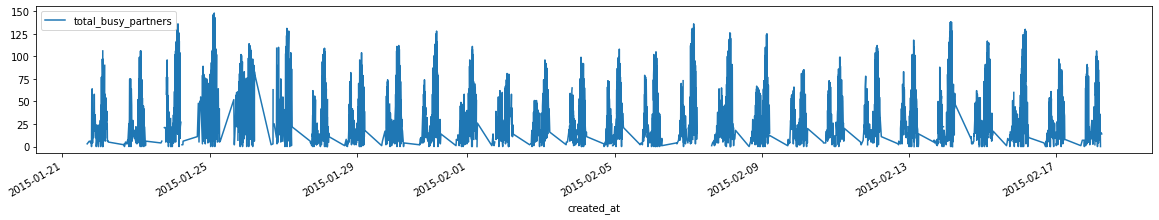

In [ ]:
df[["created_at","total_busy_partners"]].set_index("created_at").head(5000).plot()

<AxesSubplot:xlabel='created_at'>

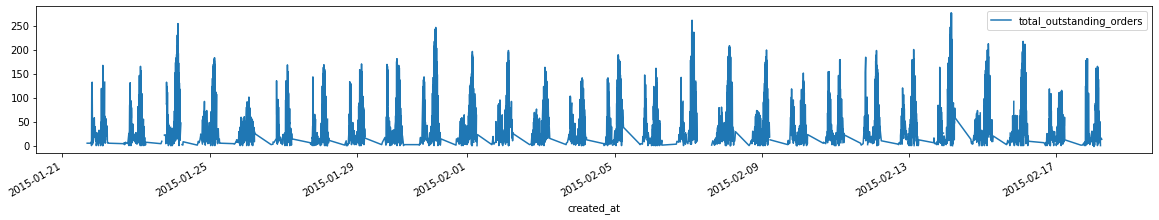

In [ ]:
df[["created_at","total_outstanding_orders"]].set_index("created_at").head(5000).plot()

## store_primary_category

In [ ]:
df["store_primary_category"].nunique()

74

In [ ]:
# df["store_primary_category"].value_counts(dropna=False)

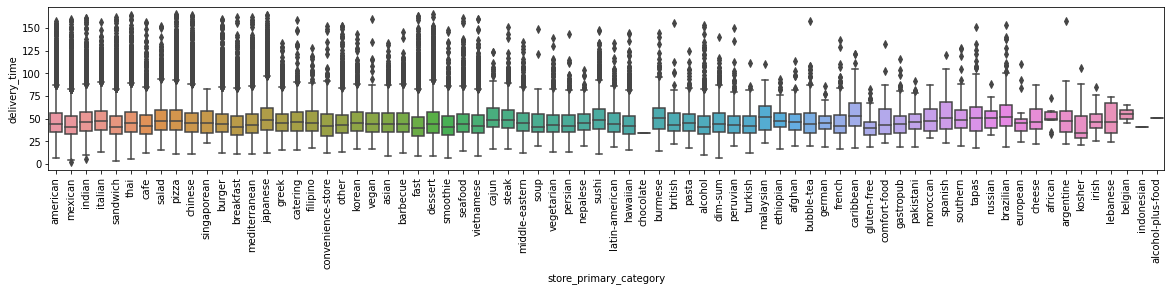

In [ ]:

sns.boxplot(x = df["store_primary_category"],
            y = df["delivery_time"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# filling NaN category store primary category with Other.
df.store_primary_category = df.store_primary_category.fillna("Other")


In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)


## Engineering Feature called Ordered_at_hour : at what hour the order was creatd

In [ ]:
df["order_at_hour"] = df["created_at"].dt.hour


In [ ]:
df["created_at"].dt.month_name().value_counts()

February    128796
January      68427
Name: created_at, dtype: int64

<AxesSubplot:ylabel='order_at_hour'>

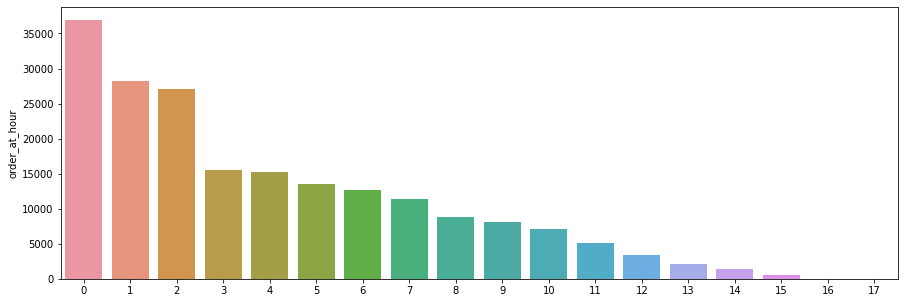

In [ ]:
order_time = df["order_at_hour"].value_counts().reset_index().sort_values(by="index")
sns.barplot(x =order_time.index,
            y = order_time.order_at_hour)

<AxesSubplot:xlabel='order_at_hour', ylabel='delivery_time'>

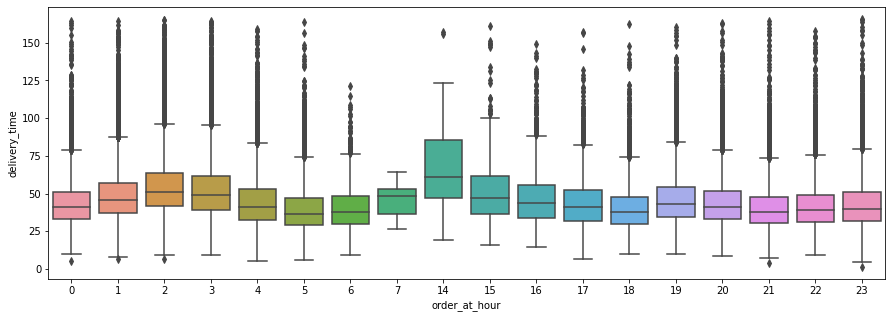

In [ ]:
sns.boxplot(x = df["order_at_hour"],
            y = df["delivery_time"])

<AxesSubplot:xlabel='order_at_hour'>

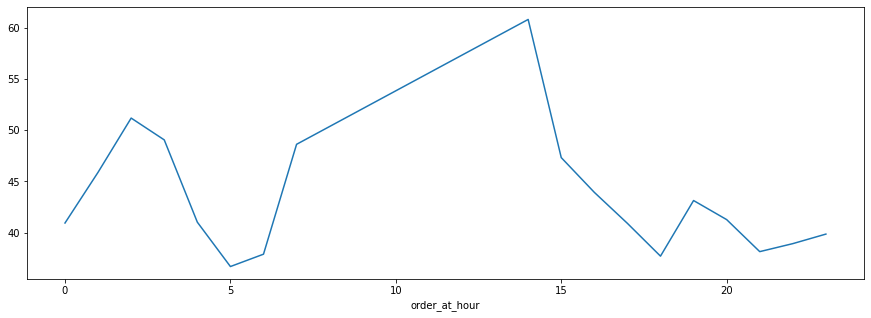

In [ ]:
df.groupby("order_at_hour")["delivery_time"].median().plot()

In [ ]:
df["market_id"].nunique(dropna=False)

7

2.0    28.035997
4.0    24.233962
1.0    19.348543
3.0    11.861168
5.0     9.164938
6.0     7.355392
Name: market_id, dtype: float64

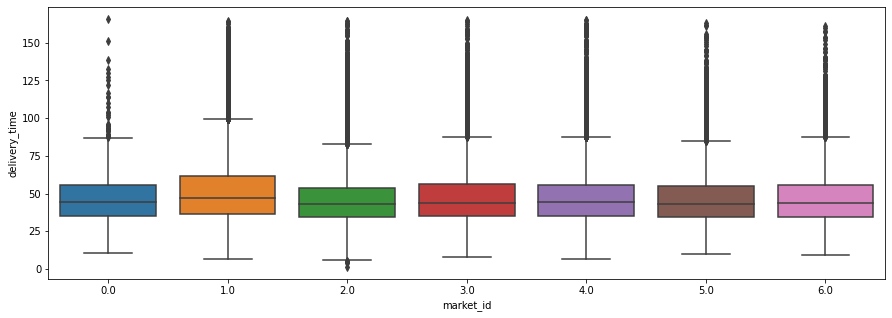

In [ ]:
from locale import normalize
display(df["market_id"].value_counts(normalize=True)*100)
df["market_id"] = df["market_id"].fillna(0)
df["market_id"] = df["market_id"].astype("object")
sns.boxplot(x = df["market_id"],
            y = df["delivery_time"])
plt.show()

### filling null values of Total_onshift_partners , busy partners and outstanding orders as per median of the relevant hour from the data.

In [ ]:
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df.groupby('order_at_hour')['total_onshift_partners'].transform('median'))
df['total_busy_partners'] = df['total_busy_partners'].fillna(df.groupby('order_at_hour')['total_busy_partners'].transform('median'))
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df.groupby('order_at_hour')['total_outstanding_orders'].transform('median'))

In [ ]:
# remaining null values check :

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ["Feature", "Missing_values"]
missing_values["Missing_values_percentage"] = missing_values["Missing_values"]/len(df) * 100
missing_values


,Feature,Missing_values,Missing_values_percentage
0,market_id,0,0.0
1,created_at,0,0.0
2,actual_delivery_time,0,0.0
3,store_id,0,0.0
4,store_primary_category,0,0.0
5,order_protocol,0,0.0
6,total_items,0,0.0
7,subtotal,0,0.0
8,num_distinct_items,0,0.0
9,min_item_price,0,0.0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.sample()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
135706,2.0,2015-01-25 23:15:37,2015-01-26 00:05:56,7c3349793d7221d1d89a6f9853009048,other,4.0,2,1428,2,559,869,10.0,10.0,9.0,50.316667,23


In [ ]:
df.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,7,180820,177930,6742,75,8,57,8366,20,2312,2651,172,159,281,6940,18


In [ ]:
df.order_at_hour = df.order_at_hour.astype("object")

In [ ]:
df.describe(include="object")

,market_id,store_id,store_primary_category,order_protocol,order_at_hour
count,197223.0,197223,197223,197223.0,197223
unique,7.0,6742,75,8.0,18
top,2.0,d43ab110ab2489d6b9b2caa394bf920f,american,1.0,2
freq,55017.0,936,19378,54671.0,36932


<AxesSubplot:>

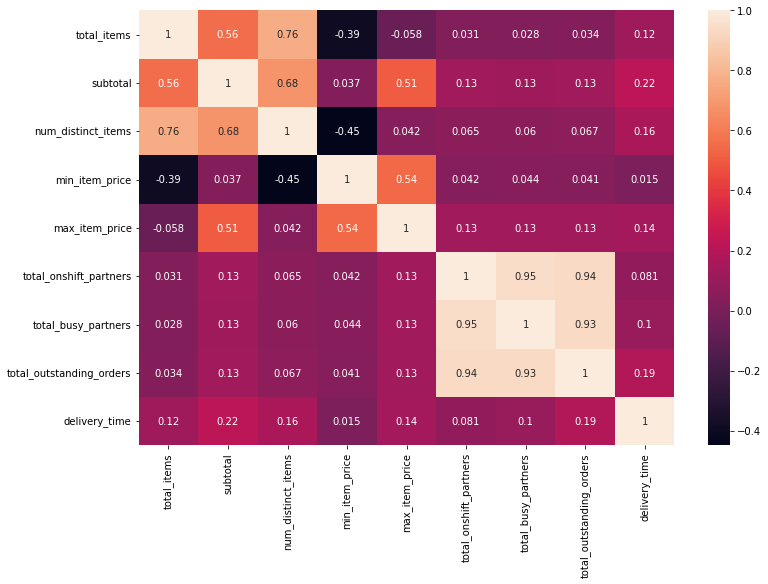

In [ ]:
 plt.rcParams['figure.figsize'] = (12, 8)

 sns.heatmap(df.corr(),annot=True)


In [ ]:
# df

<AxesSubplot:>

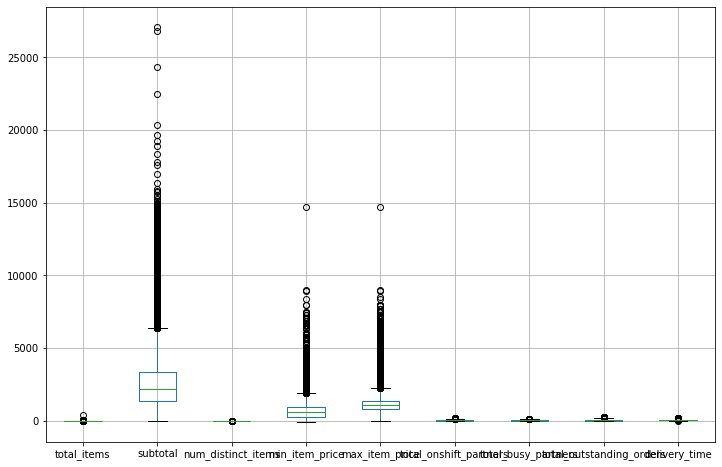

In [ ]:
df.boxplot()

# Encoding :

In [ ]:
data = df.copy(deep = True)

In [ ]:
data.drop(["created_at","actual_delivery_time"],axis = 1, inplace = True)

In [ ]:
data.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21
2,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20
3,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21
4,3.0,f0ade77b43923b38237db569b016ba25,Other,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2


### Target  Encoding with Median of Delivery Time :

In [ ]:
data['store_id'] = data.groupby('store_id')['delivery_time'].transform('median')
data['store_primary_category'] = data.groupby('store_primary_category')['delivery_time'].transform('median')

data['order_at_hour'] = data.groupby('order_at_hour')['delivery_time'].transform('median')


In [ ]:
data.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,1.0,62.983333,44.350000,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,38.916667
1,2.0,39.833333,41.333333,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,38.133333
2,3.0,39.833333,44.816667,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,41.266667
3,3.0,39.833333,44.816667,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,38.133333
4,3.0,39.833333,44.816667,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,51.200000


In [ ]:
data['market_id'] = data.groupby('market_id')['delivery_time'].transform('median')
data['order_protocol'] = data.groupby('order_protocol')['delivery_time'].transform('median')


In [ ]:
# encoded_data = pd.get_dummies(data,columns=["market_id","order_protocol"])

In [ ]:
# encoded_data.head()

<AxesSubplot:>

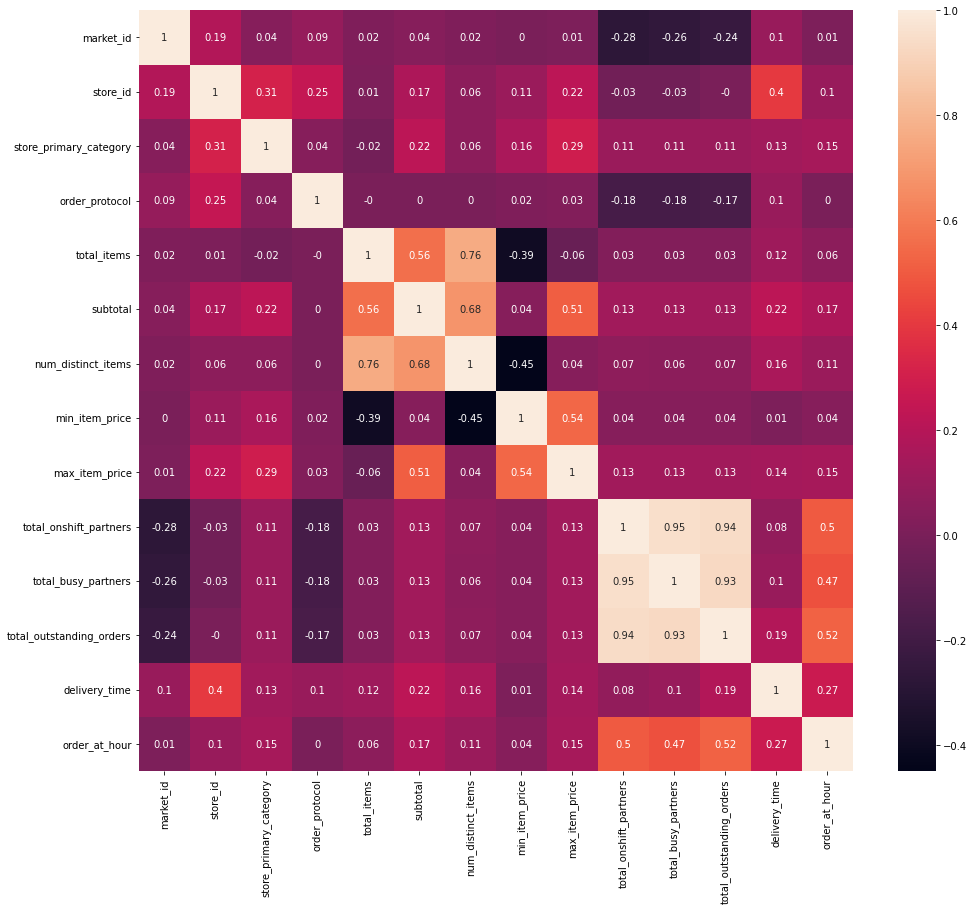

In [ ]:
 plt.rcParams['figure.figsize'] = (16, 14)

sns.heatmap(data.corr().round(2),annot=True)


### correlations

In [ ]:

correlations = data.corr()["delivery_time"]


<AxesSubplot:>

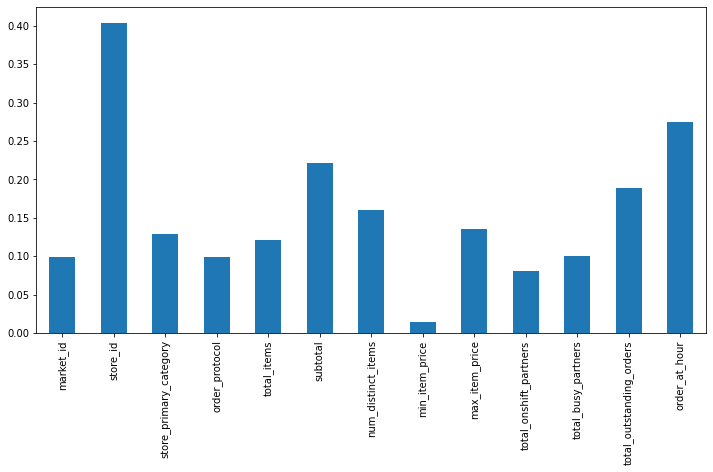

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)


correlations.drop(["delivery_time"]).plot(kind="bar")

In [ ]:
data

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_at_hour
0,46.850000,62.983333,44.350000,46.483333,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,38.916667
1,43.333333,39.833333,41.333333,44.100000,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,38.133333
2,44.083333,39.833333,44.816667,46.483333,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,41.266667
3,44.083333,39.833333,44.816667,46.483333,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,38.133333
4,44.083333,39.833333,44.816667,46.483333,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,51.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,46.850000,50.916667,40.183333,44.250000,3,1389,3,345,649,17.0,17.0,23.0,65.116667,40.933333
197424,46.850000,50.916667,40.183333,44.250000,6,3010,4,405,825,12.0,11.0,14.0,56.383333,40.933333
197425,46.850000,50.916667,40.183333,44.250000,5,1836,3,300,399,39.0,41.0,40.0,50.133333,41.016667
197426,46.850000,51.125000,41.366667,46.483333,1,1175,1,535,535,7.0,7.0,12.0,65.116667,37.691667


In [ ]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics.pairwise import cosine_distances


In [ ]:
# # Define cosine distance metric function
# def cosine_distance(x, y):
#     return cosine_distances([x], [y])[0][0]

## Outliers removal : LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# create an LOF object
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.3)

# fit the LOF object to your data
lof.fit(data)

# predict the outlier scores for each data point
outlier_scores = lof.negative_outlier_factor_

In [ ]:
outliers = lof.fit_predict(data)

In [ ]:
outliers.shape

(197223,)

In [ ]:
data.shape

(197223, 14)

In [ ]:
after_outlier = data.loc[np.where(outliers==-1,False,True)]

In [ ]:
after_outlier.shape

(138056, 14)

# train_test_split

In [ ]:
X = after_outlier.drop(['delivery_time'],axis = 1)
y = after_outlier["delivery_time"]

In [ ]:
X.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'order_at_hour'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,
                                                      y,
                                                      test_size = 0.20,
                                                      random_state=225)

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# pd.DataFrame(X_test,columns=X.columns)

# RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, median_absolute_error, r2_score, adjusted_mutual_info_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(max_depth=25,
                             random_state=452,
                             bootstrap =True,
                             n_estimators=200,
                             n_jobs=-1
                              )
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=200, n_jobs=-1,
                      random_state=452)

In [ ]:
y_test_pred = RF.predict(X_test)


In [ ]:
mean_absolute_percentage_error(y_test,y_test_pred)

0.2238429857948173

In [ ]:
mean_absolute_percentage_error(y_train,RF.predict(X_train))

0.09067029384870905

In [ ]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

12.130786479366673

In [ ]:
mean_absolute_error(y_test,y_test_pred)

9.285605178918242

In [ ]:
r2_score(y_test,y_test_pred),r2_score(y_train,RF.predict(X_train))

(0.3332898716943701, 0.8942328790492111)

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBDT = GradientBoostingRegressor(n_estimators = 1500)
GBDT.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=1500)

In [ ]:
y_test_pred = GBDT.predict(X_test)
r2_score(y_test,y_test_pred),r2_score(y_train,GBDT.predict(X_train))

(0.37138249194259365, 0.42387310610914786)

In [ ]:
mean_absolute_percentage_error(y_test,y_test_pred),mean_absolute_percentage_error(y_train,GBDT.predict(X_train))

(0.2156115264657417, 0.20649206133920486)

# tensorflow : NN

In [ ]:
from sklearn.model_selection import train_test_split
# X_train , X_test, y_train , y_test = train_test_split(X,
#                                                       y,
#                                                       test_size = 0.20,

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


Training set shape: (82833, 13), (82833,)
Validation set shape: (27611, 13), (27611,)
Testing set shape: (27612, 13), (27612,)


In [ ]:
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (82833, 13), (82833,)
Validation set shape: (27611, 13), (27611,)
Testing set shape: (27612, 13), (27612,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential    # Sequencial Interface
from tensorflow.keras.layers import Dense   # Fully Connected layer

In [ ]:
X_train.shape,y_train.shape

((82833, 13), (82833,))

In [ ]:
X_test.shape,y_test.shape

((27612, 13), (27612,))

In [ ]:
%load_ext tensorboard
log_folder = 'logs'
%reload_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
tb_callback = TensorBoard(log_dir=log_folder,
                          histogram_freq=1)

In [ ]:
X_train.shape

(82833, 13)

In [ ]:
def create_model():

    model = Sequential([

        Dense(32,activation=tf.nn.elu,input_shape=(13,),
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H1"),
        Dense(64,activation=tf.nn.gelu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H2"),
        Dense(128,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H3"),
        Dense(256,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H4"),

        Dense(512,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H5"),
        Dense(256,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H6"),
        Dense(128,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H7"),
        Dense(64,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H8"),
        Dense(32,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H9"),
        Dense(16,activation=tf.nn.elu,
              kernel_initializer=tf.keras.initializers.GlorotUniform,
              name="H10"),
        Dense(1,activation='linear',
              name="output"),

    ])


    model.compile(

        optimizer= tf.keras.optimizers.Adam(),
        loss='mse',
        metrics= tf.keras.metrics.mean_absolute_percentage_error

    )

    return model

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model = create_model()
history = model.fit(X_train,
                    y_train,
                    validation_data= (X_val,y_val),
                    epochs=500,
                    batch_size=500,
                    callbacks=[tb_callback,early_stopping_callback]
                    )

Epoch 1/500
166/166 [==============================] - 10s 46ms/step - loss: 267.8112 - mean_absolute_percentage_error: 27.9242 - val_loss: 159.2616 - val_mean_absolute_percentage_error: 24.6485
Epoch 2/500
166/166 [==============================] - 7s 42ms/step - loss: 151.8375 - mean_absolute_percentage_error: 22.6864 - val_loss: 150.5435 - val_mean_absolute_percentage_error: 21.8550
Epoch 3/500
166/166 [==============================] - 7s 43ms/step - loss: 148.8573 - mean_absolute_percentage_error: 22.4275 - val_loss: 148.0722 - val_mean_absolute_percentage_error: 22.8696
Epoch 4/500
166/166 [==============================] - 7s 44ms/step - loss: 147.8243 - mean_absolute_percentage_error: 22.3397 - val_loss: 149.8496 - val_mean_absolute_percentage_error: 23.3362
Epoch 5/500
166/166 [==============================] - 7s 41ms/step - loss: 146.7465 - mean_absolute_percentage_error: 22.2817 - val_loss: 146.3928 - val_mean_absolute_percentage_error: 21.8565
Epoch 6/500
166/166 [========

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1 (Dense)                  (None, 32)                448       
                                                                 
 H2 (Dense)                  (None, 64)                2112      
                                                                 
 H3 (Dense)                  (None, 128)               8320      
                                                                 
 H4 (Dense)                  (None, 256)               33024     
                                                                 
 H5 (Dense)                  (None, 512)               131584    
                                                                 
 H6 (Dense)                  (None, 256)               131328    
                                                                 
 H7 (Dense)                  (None, 128)              

In [ ]:
%tensorboard --logdir={log_folder}


In [ ]:
pd.DataFrame(history.history)

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,298.907898,29.410074,160.194122,23.344046
1,155.202835,22.880062,153.478455,23.990913
2,150.463470,22.572657,150.923904,21.674973
3,149.507782,22.484426,149.721939,21.723761
4,147.533646,22.329462,147.317490,22.507299
5,146.460846,22.283640,147.137482,22.010813
6,146.365875,22.226589,146.601395,22.536686
7,145.420258,22.192144,147.614487,22.650839
8,145.955231,22.189272,147.134094,23.016855
9,145.261307,22.148327,145.868744,22.297724


In [ ]:
model.evaluate(X_test,y_test)


863/863 [==============================] - 3s 3ms/step - loss: 144.3291 - mean_absolute_percentage_error: 22.8036


[144.3291473388672, 22.803646087646484]

In [ ]:
history.history.keys()



dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

In [ ]:
epochs = history.epoch

loss = history.history["loss"]
mean_absolute_percentage_error = history.history["mean_absolute_percentage_error"]

val_loss = history.history["val_loss"]
val_mean_absolute_percentage_error = history.history["val_mean_absolute_percentage_error"]

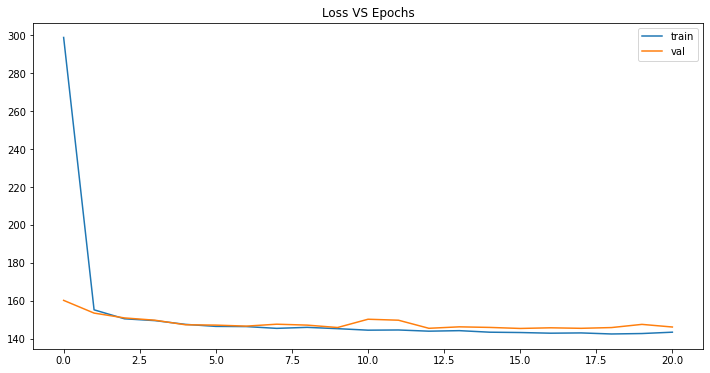

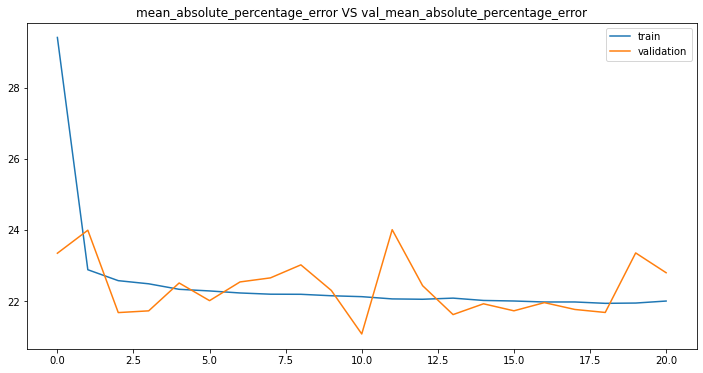

In [ ]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, mean_absolute_percentage_error, label="train")
plt.plot(epochs, val_mean_absolute_percentage_error, label="validation")
plt.legend()
plt.title("mean_absolute_percentage_error VS val_mean_absolute_percentage_error")
plt.show()

In [ ]:
y_pred = model.predict(X_test)

863/863 [==============================] - 3s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.22803643127748113

In [ ]:
mean_absolute_error(y_test,y_pred)

9.289569881634835

#      Leading Questions:



### **Defining the problem statements and where can this and modifications of this be used?**

- **The problem statement**  is that Porter, India's largest marketplace for intra-city logistics, wants to provide estimated delivery times to its customers for food orders from various restaurants. The challenge is to estimate the delivery time based on factors such as the order details, pickup location, and the availability of delivery partners, in order to meet customers' expectations and improve their overall experience.


- **This can be used** by a range of businesses and industries such as food delivery, e-commerce, logistics and courier services, and transportation and ride-sharing services to estimate delivery times for their services. By using this approach to factor in variables such as restaurant location, traffic conditions, distance, and delivery partner availability, businesses can provide customers with more accurate and timely delivery estimates, manage customer expectations, and improve overall customer experience.


### **List 3 functions the pandas datetime provides with one line explanation.**


      pd.to_datetime(): Converts a string or a sequence of strings into a pandas datetime object.

      pd.Timestamp(): Creates a pandas Timestamp object representing a specific date and time.

      pd.date_range(): Generates a fixed frequency datetime index with regular intervals between the start and end dates.

      dt.date(): Extracts the date component from a pandas datetime object.

      dt.time(): Extracts the time component from a pandas datetime object.

      dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second: Extracts the corresponding component from a pandas datetime object.

      dt.weekday(): Returns the day of the week as an integer, where Monday is 0 and Sunday is 6.

      dt.tz_localize(): Localizes a naive datetime to a specific time zone.

      pd.Timedelta(): Represents a duration or difference between two datetime values.


### **Short note on datetime, timedelta, time span (period)**

- Datetime refers to a specific point in time, such as a particular date and time of day. In Python, datetime objects can be created and manipulated using the datetime module. Datetime objects represent a specific point in time with year, month, day, hour, minute, second, and microsecond precision.

- Timedelta is a duration expressing the difference between two dates or times. It can be used to represent intervals of time, such as a number of days, hours, minutes, or seconds. Timedelta objects can be created and manipulated using the datetime module.

- Time span, also known as a period, refers to a fixed-length interval of time. In pandas, the Period class represents a period of time with a fixed frequency, such as a day, week, or month. Period objects can be used to perform arithmetic operations with other periods or datetimes.

### **Name 3 outlier removal methods?**

- Z-score method: This method involves calculating the z-score for each data point in a dataset, which is the number of standard deviations away from the mean. Data points with z-scores above a certain threshold are considered outliers and can be removed from the dataset.

- Interquartile range (IQR) method: This method involves calculating the IQR, which is the difference between the 75th and 25th percentiles of the data. Data points outside a certain range of the IQR are considered outliers and can be removed from the dataset.

- Visual inspection: This method involves visually inspecting a plot of the data, such as a scatter plot or histogram, to identify data points that are significantly different from the others. Data points that appear to be outliers can be removed from the dataset.

- **Unsupervised outlier detection methods :**

- Clustering-based methods: These methods involve clustering the data points and identifying the points that do not belong to any cluster or belong to a cluster with significantly fewer points than the others. Examples of clustering-based methods include k-means clustering, DBSCAN, and hierarchical clustering.

- Density-based methods: These methods involve identifying the regions of the data with low density and considering the points in these regions as outliers. Examples of density-based methods include Local Outlier Factor (LOF), Gaussian Mixture Models (GMM), and Kernel Density Estimation (KDE).

- Distance-based methods: These methods involve computing the distance between each data point and its neighbors and identifying the points with large distances as outliers. Examples of distance-based methods include Local Outlier Factor (LOF), Isolation Forest, and Angle-Based Outlier Detection (ABOD).




### **What classical machine learning methods can we use other than random forest for regression?**

- Linear Regression: This is one of the simplest and most widely used regression techniques. It models the relationship between the independent variables and the dependent variable using a linear function.

- Support Vector Regression (SVR): This is a regression technique based on Support Vector Machines (SVMs) that uses a linear or non-linear kernel to model the relationship between the input features and the output variable.

- Gradient Boosting Regression: This is a popular ensemble learning technique that builds an additive model in a forward stage-wise manner, combining the outputs of many weak learners (usually decision trees).

- Neural Networks: This is a versatile and powerful technique that can be used for regression tasks. It involves building a network of interconnected nodes that perform mathematical operations on the input features to predict the output variable.

- K-Nearest Neighbors (KNN) Regression: This is a non-parametric regression technique that predicts the output value of a new data point based on the average of the K-nearest training data points in feature space.

### **Why is scaling required for neural networks?**

- Scaling is an important preprocessing step for neural networks because it helps to ensure that all input features are treated equally by the network during training. Neural networks are sensitive to the scale and distribution of the input data, and if the input features have different scales, the network may assign too much importance to some features and too little importance to others, leading to poor performance.

- **There are two main reasons why scaling is required for neural networks:**

  - Gradient Descent Optimization: Most neural networks use gradient descent optimization to update the weights of the network during training. Gradient descent works by calculating the gradient of the loss function with respect to the weights, which is used to update the weights in the direction that minimizes the loss. If the input features have different scales, the gradients can be dominated by the features with larger scales, making it difficult for the network to converge to a good solution.

  - Activation Functions: The activation functions used in neural networks, such as sigmoid, tanh, and ReLU, are sensitive to the scale of the input data. If the input features have different scales, the activation functions may saturate or become insensitive to changes in the input, leading to poor performance.

- By scaling the input data to have similar ranges, we can ensure that the network is able to learn the important features of the data and converge to a good solution during training. Common scaling techniques used for neural networks include standardization (scaling the data to have zero mean and unit variance) and normalization (scaling the data to have a range between 0 and 1 or -1 and 1).

### **Briefly explain your choice of optimizer.**

- Here are some reasons why Adam is  chosen as the optimizer for neural networks:

- Adaptive Learning Rate:
  -  Adam uses adaptive learning rates for each weight of the network, which means that the learning rate is adjusted automatically based on the gradient history of each weight. This helps to prevent the network from getting stuck in local minima and improves the convergence rate of the algorithm.

- Momentum Optimization:
  - Adam uses momentum optimization, which helps the algorithm to accelerate in the relevant direction and dampen oscillations. This results in faster convergence and better generalization.

- Regularization:
  - Adam includes L2 regularization, which helps to prevent overfitting of the model.

- Suitable for Large Datasets:
  - Adam is well-suited for large datasets because it maintains a moving average of the gradients and their squared values, which helps to reduce the variance of the gradient estimates.

- No Manual Tuning:
  - Adam does not require manual tuning of hyperparameters, which can save time and effort in the model development process.

### **Which activation function did you use and why?**

- ReLU:

- Non-Linear:
  - ReLU is a non-linear activation function, which means that it can model non-linear relationships between the input features and the output variable. This allows neural networks to learn complex functions and patterns in the data.

- Computationally Efficient:
  - ReLU is a simple function to compute and does not require expensive operations such as exponentials or logarithms like other activation functions, making it computationally efficient.

- Prevents Vanishing Gradient Problem:
  - ReLU helps to prevent the vanishing gradient problem that can occur in deep neural networks. The gradient of ReLU is either 0 or 1, which means that it does not saturate like other activation functions such as sigmoid or tanh. This helps to propagate gradients back through many layers and allows deep networks to learn complex functions.

- Sparsity:
  - ReLU produces sparse representations because it outputs zero for negative inputs. This can help to reduce the computational cost of the network and prevent overfitting by reducing the number of parameters.

- Empirically Proven:
  - ReLU has been shown to perform well in many applications and is often used as the default activation function in many neural network architectures.

### **Why does a neural network perform well on a large dataset?**


- Ability to Learn Complex Patterns: Neural networks are powerful models that can learn complex patterns and relationships in data. A large dataset provides more examples of these patterns and relationships, allowing the network to learn more accurate and representative models of the data.

- Reduced Overfitting: With a large dataset, there is less chance of overfitting the model to the training data, as there is more variation and diversity in the data. This can result in better generalization and improved performance on new and unseen data.

- Improved Optimization: Neural networks use optimization algorithms to adjust the weights and biases of the model during training. With a large dataset, there is more data to update the parameters, allowing the optimization algorithm to find better solutions and converge faster.

- Improved Regularization: Regularization techniques, such as dropout and weight decay, can improve the performance of neural networks by preventing overfitting. With a large dataset, regularization can be more effective, as there is more data to generalize from.

- Reduced Bias: A large dataset is likely to be more representative of the population, reducing the bias in the model and improving its accuracy and generalization.
